# **Project 2 - Nhóm thực hiện: 19**
### Thành viên
1. Nguyễn Phú Sang
2. Lâm Phát Đạt
3. Đồng Văn Xướng

# **1. Combining Spatial Enhancement Methods**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

(-0.5, 274.5, 427.5, -0.5)

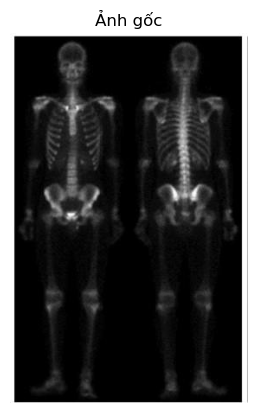

In [ ]:
# (a)
image = cv2.imread('./bone.jpg', 0)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

(-0.5, 274.5, 427.5, -0.5)

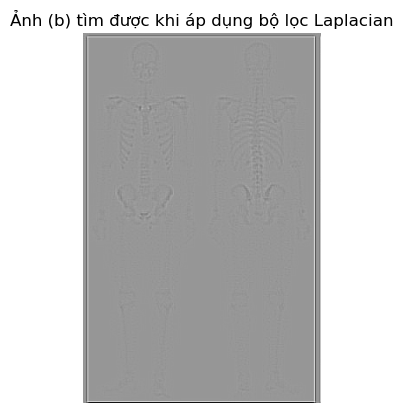

In [ ]:
# (b) Áp dụng bộ lọc Laplacian
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)

plt.imshow(laplacian, cmap='gray')
plt.title('Ảnh (b) tìm được khi áp dụng bộ lọc Laplacian')
plt.axis('off')

(-0.5, 274.5, 427.5, -0.5)

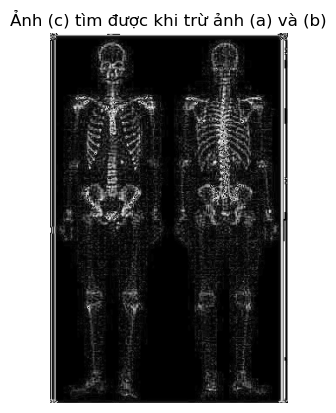

In [ ]:
# (c) Phiên bản sắc nét của quét xương đạt được bằng cách trừ (a) và (b)
sharpened = image - laplacian
sharpened = np.uint8(np.absolute(sharpened))

plt.imshow(sharpened, cmap='gray')
plt.title('Ảnh (c) tìm được khi trừ ảnh (a) và (b)')
plt.axis('off')

(-0.5, 274.5, 427.5, -0.5)

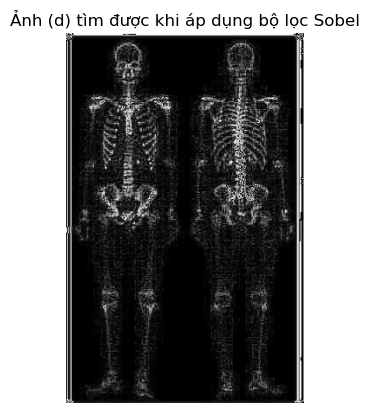

In [ ]:
# (d) Áp dụng bộ lọc Sobel
sobelx = cv2.Sobel(sharpened, cv2.CV_64F, 1, 0, ksize=3)  # Bộ lọc Sobel theo hướng X
sobely = cv2.Sobel(sharpened, cv2.CV_64F, 1, 0, ksize=3)  # Bộ lọc Sobel theo hướng Y

# Tính độ lớn gradient
sobel_gr = np.abs(sobelx) + np.abs(sobely)

#Chuẩn hóa kết quả về khoảng [0, 255]
sobel_gr = cv2.normalize(sharpened, None, 0, 255, cv2.NORM_MINMAX)

#Chuyển đổi về kiểu uint8
sobel_gr = sobel_gr.astype(np.uint8)

plt.imshow(sobel_gr, cmap='gray')
plt.title('Ảnh (d) tìm được khi áp dụng bộ lọc Sobel')
plt.axis('off')

(-0.5, 274.5, 427.5, -0.5)

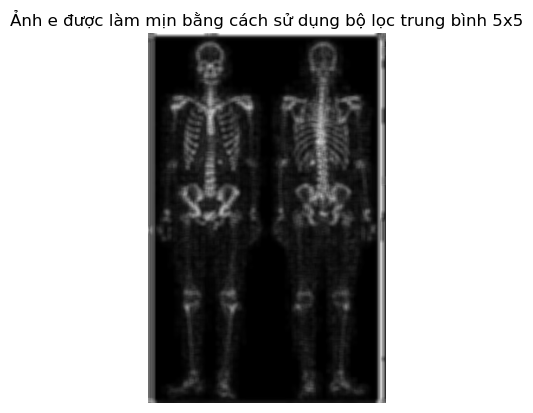

In [ ]:
# (e) Được làm mịn bằng cách sử dụng bộ lọc trung bình 5x5
averaged = cv2.blur(sobel_gr, (5, 5))

plt.imshow(averaged, cmap='gray')
plt.title('Ảnh e được làm mịn bằng cách sử dụng bộ lọc trung bình 5x5')
plt.axis('off')

(-0.5, 274.5, 427.5, -0.5)

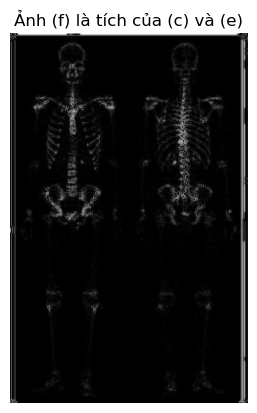

In [ ]:
# (f) Tích của (c) và (e)
sharpened = sharpened.astype(np.float32) / 255
averaged = averaged.astype(np.float32) / 255
product = sharpened * averaged

plt.imshow(product, cmap='gray')
plt.title('Ảnh (f) là tích của (c) và (e)')
plt.axis('off')

(-0.5, 274.5, 427.5, -0.5)

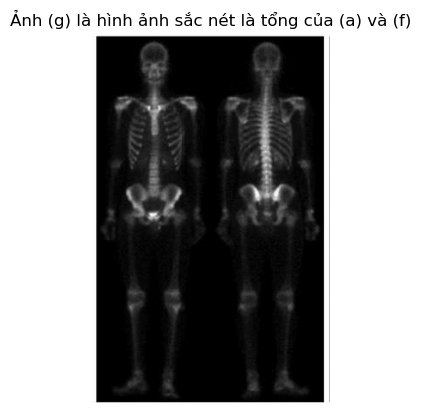

In [ ]:
# (g) Hình ảnh sắc nét là tổng của (a) và (f)
combined = image + product

plt.imshow(combined, cmap='gray')
plt.title('Ảnh (g) là hình ảnh sắc nét là tổng của (a) và (f)')
plt.axis('off')

(-0.5, 274.5, 427.5, -0.5)

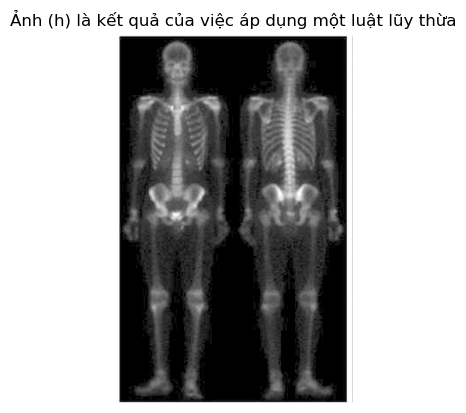

In [ ]:
# (h) Kết quả của việc áp dụng một luật lũy thừa
gamma = 0.5
gamma_corrected = np.array(255 * (combined / 255) ** gamma, dtype='uint8')

plt.imshow(gamma_corrected, cmap='gray')
plt.title('Ảnh (h) là kết quả của việc áp dụng một luật lũy thừa')
plt.axis('off')

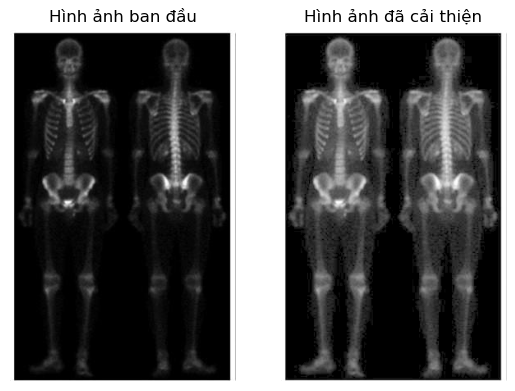

In [ ]:
# Hiển thị hình ảnh ban đầu và hình ảnh cuối cùng
plt.subplot(1, 2, 1)
plt.title('Hình ảnh ban đầu')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Hình ảnh đã cải thiện')
plt.imshow(gamma_corrected, cmap='gray')
plt.axis('off')

plt.show()

# **2. Find Contours Function**

(-0.5, 296.5, 214.5, -0.5)

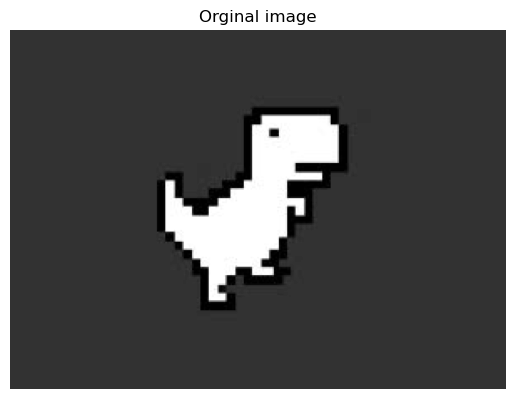

In [ ]:
image_2 = cv2.imread('./image.png', 0)
plt.imshow(image_2, cmap = 'gray')
plt.title('Orginal image')
plt.axis('off')

(-0.5, 296.5, 214.5, -0.5)

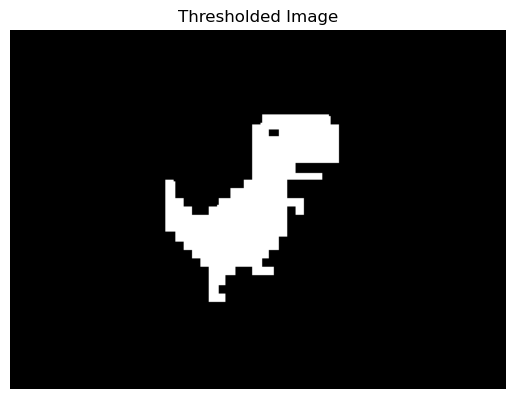

In [ ]:
# Chuyển đổi hình ảnh sang dạng nhị phân
_, anh_nhi_phan = cv2.threshold(image_2, 127, 255, cv2.THRESH_BINARY)

# Hiển thị hình ảnh ngưỡng hóa và hình ảnh với contours
plt.imshow(anh_nhi_phan, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

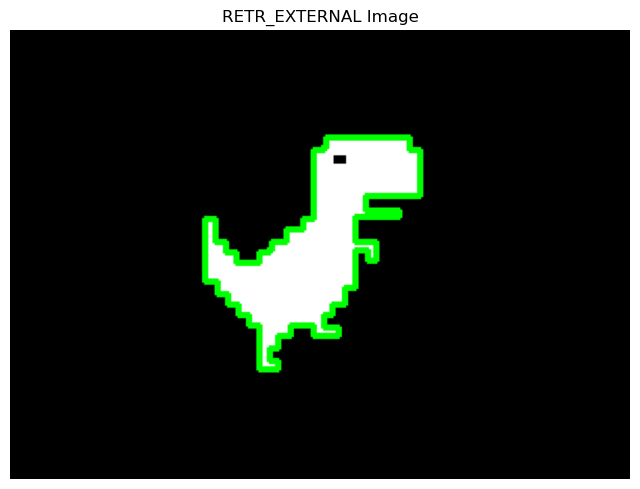

In [ ]:
# Tìm contours
contours, _ = cv2.findContours(anh_nhi_phan, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vẽ contours
contour_image = cv2.cvtColor(anh_nhi_phan, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Hiển thị hình ảnh với contours
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('RETR_EXTERNAL Image')
plt.axis('off')
plt.show()

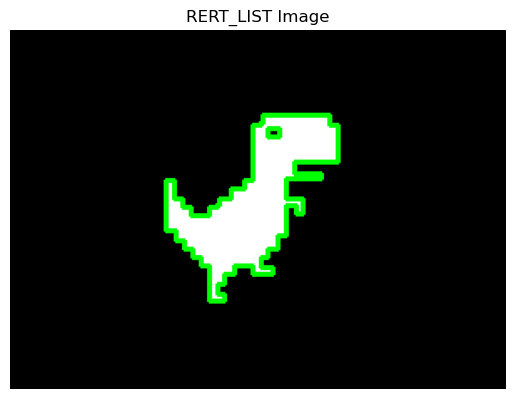

In [ ]:
# Tìm biên
contours, hierarchy = cv2.findContours(anh_nhi_phan, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Vẽ các biên lên ảnh gốc
output_image = cv2.cvtColor(anh_nhi_phan, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

# Hiển thị hình ảnh kết quả
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('RERT_LIST Image')
plt.axis('off')
plt.show()

# **3. Dice Recognition**

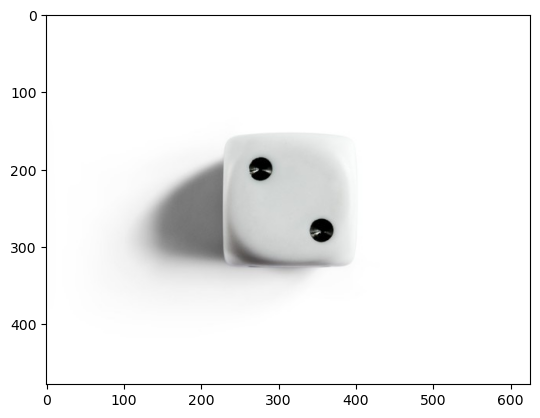

In [ ]:
# Đọc ảnh
image = cv2.imread('./1.jpg')
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

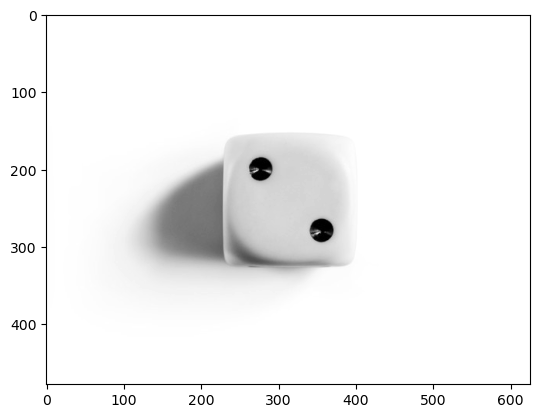

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

[[[355.85     278.85      15.67    ]
  [275.55002  198.55      15.889999]]]


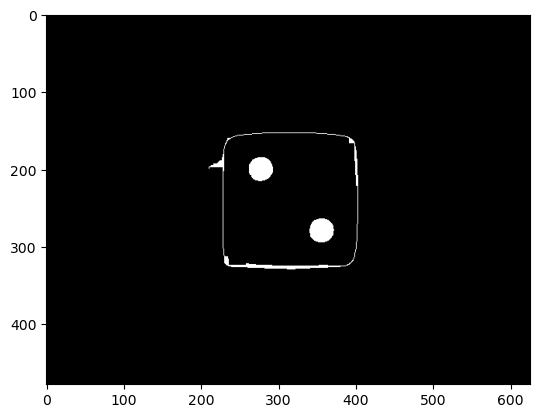

In [ ]:
# Phát hiện các cạnh bằng phương pháp phát hiện cạnh Canny
detected_edges = cv2.Canny(image_gray,9, 150, 3)

# Tạo kernel hình chữ nhật có kích thước 9x9 để dùng trong các phép biến đổi hình thái học
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))

# Áp dụng phép biến đổi đóng (morphological closing) lên ảnh cạnh đã phát hiện
close = cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=2)

# Tìm các hình tròn trong ảnh đã qua phép đóng bằng phương pháp HoughCircles
circles = cv2.HoughCircles(close,cv2.HOUGH_GRADIENT,dp=1.1, minDist=20,param1=50,param2=30,minRadius=5,maxRadius=55)
print(circles)

# Hiển thị ảnh đã qua phép đóng bằng matplotlib, sử dụng bảng màu xám
plt.imshow(close, cmap='gray')
plt.show()

In [ ]:
circles=circles[0,:]
print(circles)

[[355.85     278.85      15.67    ]
 [275.55002  198.55      15.889999]]


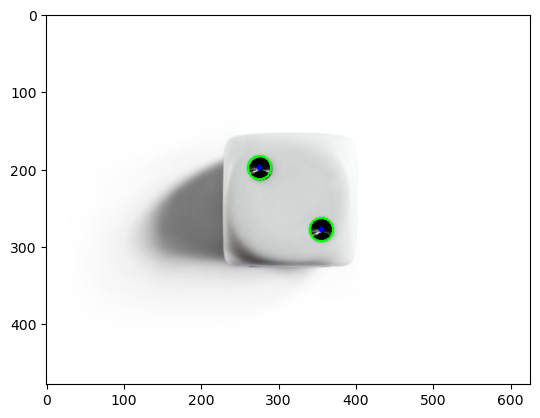

In [ ]:
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)
plt.imshow(rgb_img)
plt.show()

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dil = cv2.dilate(detected_edges,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))
print((hierarchy[0]))

1
[[-1 -1 -1 -1]]


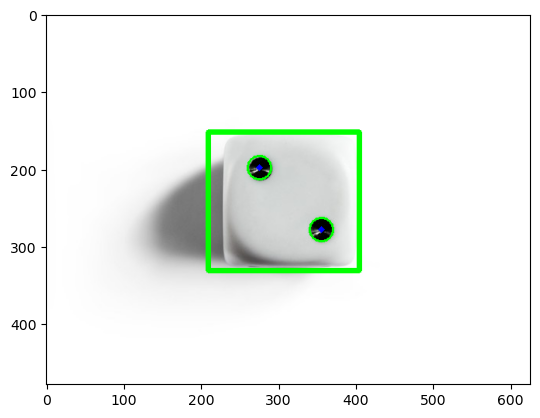

In [ ]:
# since we have 3 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

plt.imshow(rgb_img)

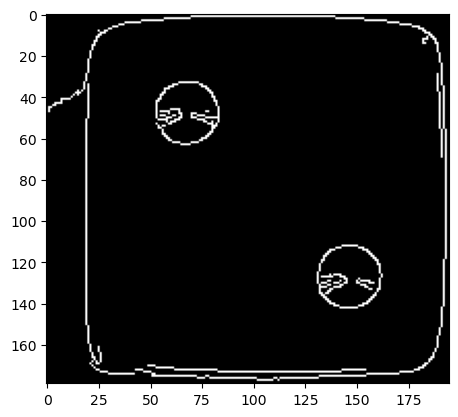

In [ ]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
plt.imshow(dice0, cmap='gray')
plt.show()


In [ ]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=30,minRadius=10,maxRadius=24)
print(len(circles0[0]))

2


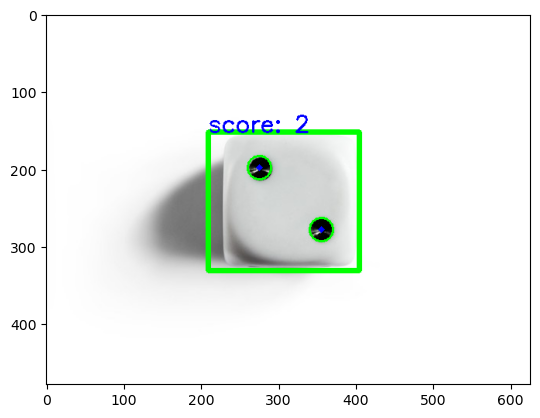

In [ ]:
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.show()

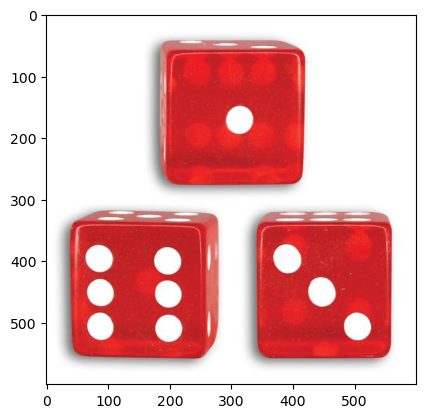

In [ ]:
# Đọc ảnh
image = cv2.imread('./2.jpg')
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

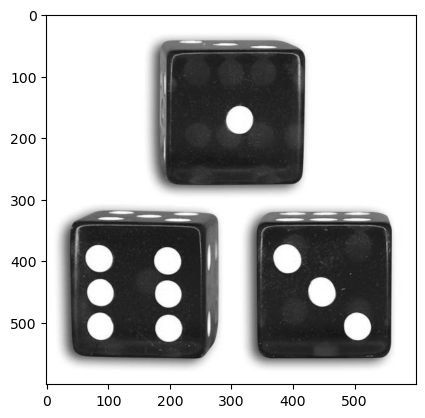

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

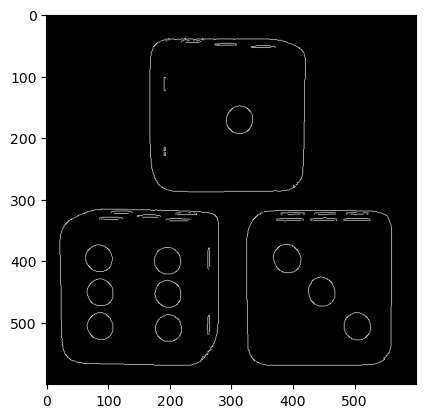

In [ ]:

# Áp dụng ngưỡng để phân biệt vùng sáng (các chấm) và nền
thresh = cv2.threshold(image_gray, 220, 255, cv2.THRESH_BINARY_INV)[1]

# Dùng phương pháp Canny để phát hiện các cạnh
detected_edges = cv2.Canny(thresh, 9, 150, 3)

# Phát hiện hình tròn bằng HoughCircles với các tham số điều chỉnh
circles = cv2.HoughCircles(
    detected_edges,                   # Ảnh sau khi phát hiện cạnh
    cv2.HOUGH_GRADIENT,               # Phương pháp phát hiện Hough Gradient
    dp=1.2,                           # Tỷ lệ phân giải
    minDist=20,                       # Khoảng cách tối thiểu giữa các tâm hình tròn
    param1=50,                        # Ngưỡng Canny trên để phát hiện cạnh
    param2=30,                        # Ngưỡng để phát hiện trung tâm hình tròn (tăng để giảm nhiễu)
    minRadius=10,                     # Bán kính tối thiểu để phát hiện hình tròn
    maxRadius=24                      # Bán kính tối đa để phát hiện hình tròn
)


# Hiển thị ảnh cạnh sau khi dùng Canny
plt.imshow(detected_edges, cmap='gray')

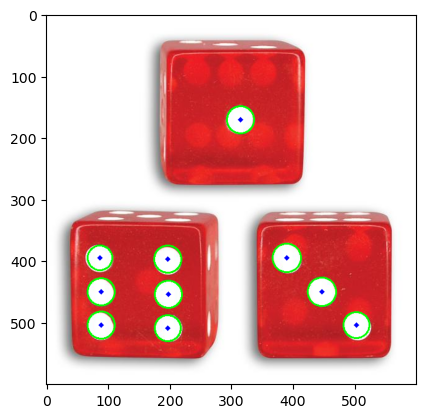

In [ ]:

circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)
plt.imshow(rgb_img)
plt.show()

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dil = cv2.dilate(detected_edges,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))
print((hierarchy[0]))

3
[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [-1  1 -1 -1]]


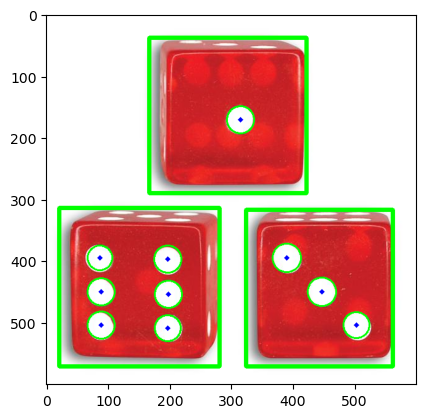

In [ ]:
# since we have 3 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(rgb_img, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)

x2, y2, w2, h2= cv2.boundingRect(contours[2])
cv2.rectangle(rgb_img, (x2,y2),(x2+w2,y2+h2), (0,255,0),5)


plt.imshow(rgb_img)

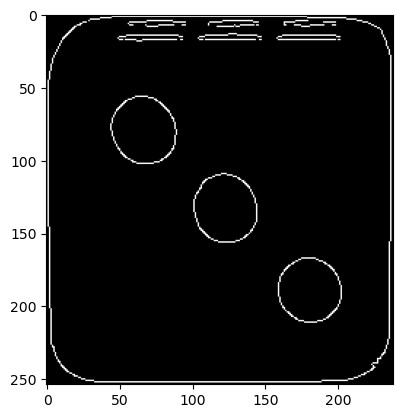

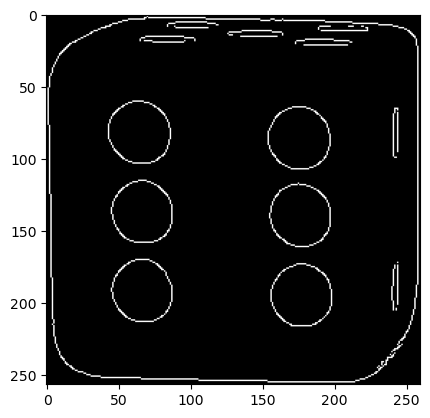

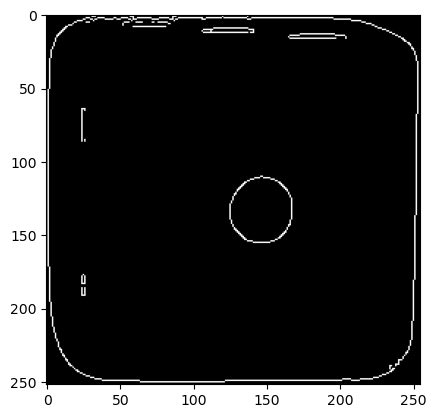

In [ ]:

dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]
dice2 = detected_edges[y2:y2+h2, x2:x2+w2]

plt.imshow(dice0, cmap='gray')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.show()
plt.imshow(dice2, cmap='gray')
plt.show()

In [ ]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=30,minRadius=10,maxRadius=24)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=30,minRadius=10,maxRadius=24)
circles2 = cv2.HoughCircles(dice2,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=30,minRadius=10,maxRadius=24)
print(len(circles0[0]), len(circles1[0]), len(circles2[0]))

3 6 1


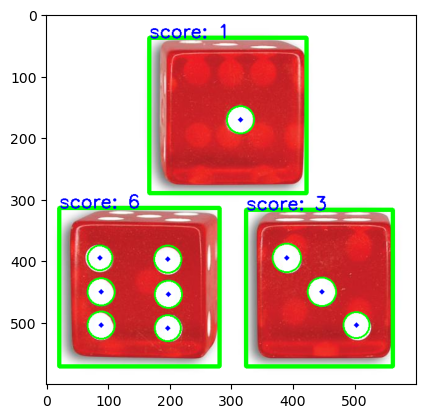

In [ ]:

cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles2[0])}', (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.show()

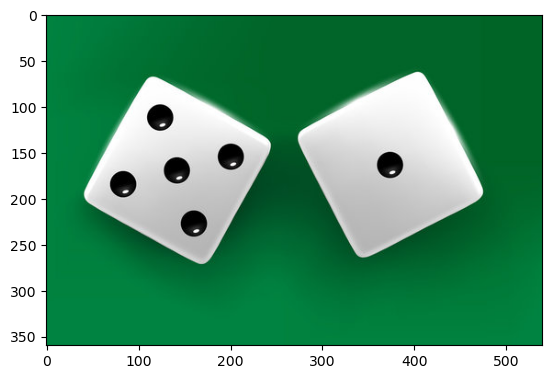

In [ ]:
# Đọc ảnh
image = cv2.imread('./3.jpg')
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

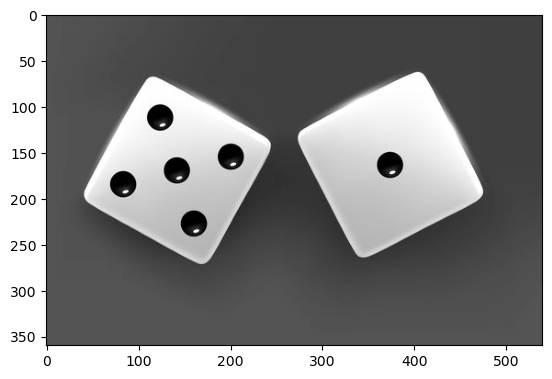

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

6


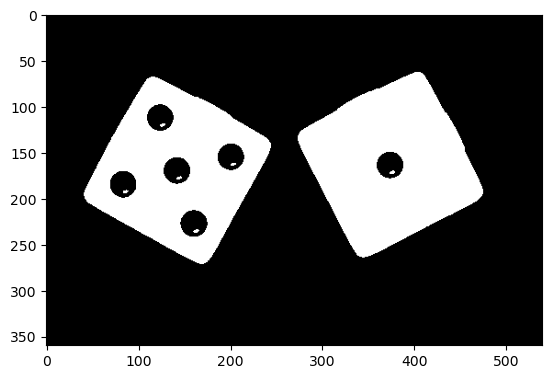

In [ ]:
thresh = cv2.threshold(image_gray,150,255, cv2.THRESH_BINARY)[1]


detected_edges = cv2.Canny(thresh,9, 150, 3)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

#dil = cv2.dilate(detected_edges,kernel,iterations = 1)
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

#close = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel)

#ret, close = cv2.threshold(close, 20, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(close,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=1,maxRadius=35)
print(len(circles[0]))

plt.imshow(close, cmap='gray')
plt.show()

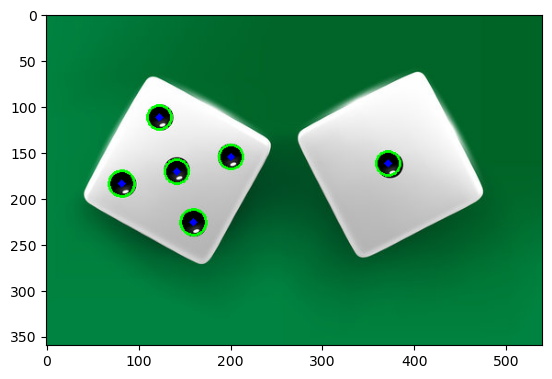

In [ ]:
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)
plt.imshow(rgb_img)
plt.show()

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dil = cv2.dilate(detected_edges,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))
print((hierarchy[0]))

2
[[ 1 -1 -1 -1]
 [-1  0 -1 -1]]


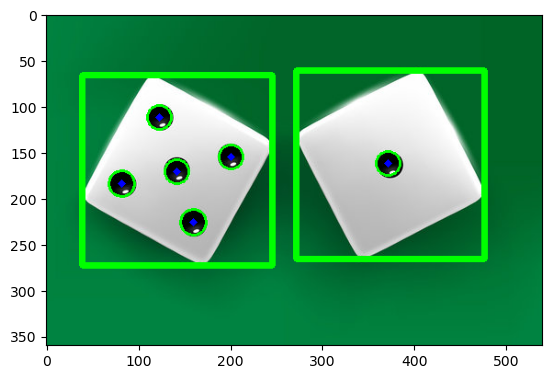

In [ ]:
# since we have 3 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(rgb_img, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)


plt.imshow(rgb_img)

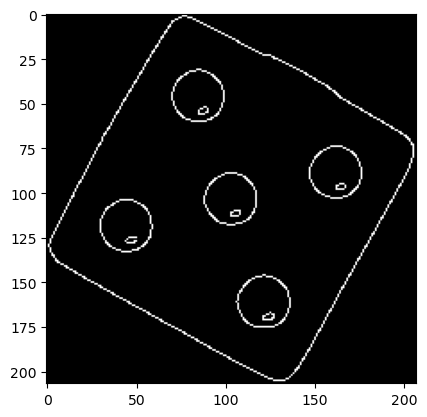

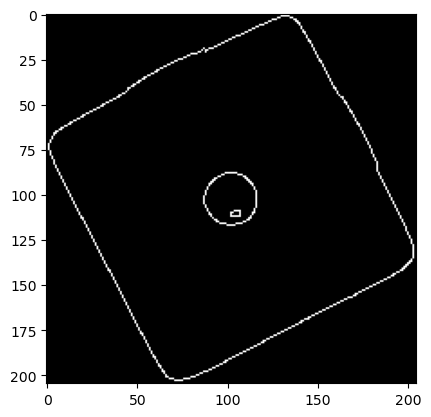

In [ ]:
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]


plt.imshow(dice0, cmap='gray')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.show()

In [ ]:
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=30,minRadius=10,maxRadius=24)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1.2,20,param1=50,param2=30,minRadius=10,maxRadius=24)
print(len(circles0[0]), len(circles1[0]))

5 1


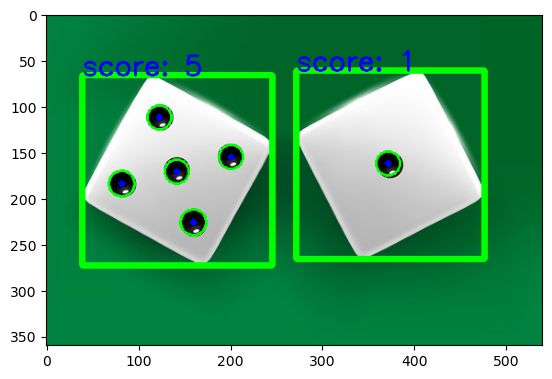

In [ ]:
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.show()